### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Загрузим библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

Выгрузим данные из файла в датафрейм

In [2]:
df_realty=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [3]:
df_realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df_realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Мы видим большое количесвто пропусков в данных. Из-за этого часть столбцов имеет формат float, остальные int и  object. Так же есть столбец с датой, который нужно будет заменить на datetime форма.
Т.к. у нас данные имею 2 типа выгрузки -введенные людьми и автоматическии. Возможно в той части, что была заполненна людьми могут быть случайные пропуски(пользователь просто не указал данные, забыл или не посчитал нужным). Так же возможно часть данных пропущена т.к. ее невозможно заполнить, например в студии нет отдельной площади комнаты и кухни и т.п., наличие балкона может быть формально, но он может быть объединен с кухней или комнатой, тут уже сложно сказать есть он или нет. 
Из автоматизированных источников мы так же можем увидеть пропуски связанные с ошибкой работы софта или некоторые столбцы могут быть неслучайные, т.к. информация не иммет смысла. Например, если у нас нет пруда рядом с домом, то и растояние до него невозможно рассчитать.

### Шаг 2. Предобработка данных

Теперь рассмотрим пропуски в даннных 'ceiling_height', 'floors_total','locality_name' невозможно адекватно заполнить, несмотря на то, что там много пропусков. Пропуски скорее всего полностью случайные. 

Скорее всего 'kitchen_area' имеет пропуски в случае если у нас 'studio' и 'open_plan'. Проверим данное утверждение

In [5]:
df_realty.loc[:,('studio','open_plan')].sum()

studio       149
open_plan     67
dtype: int64

In [6]:
df_realty.loc[df_realty['kitchen_area'].isna()==True,('studio','open_plan')].sum()

studio       149
open_plan     67
dtype: int64

Наша версия подтвердилась. Данные пропуски нельзя отнести к случайным, дело в том, что в этих категорях квартир просто невозможно выделить площадь кухни.

Для того, чтобы заполнить 'living_area','kitchen_area' рассчитаем отношение жилой площади к общей и площади кухни к общей.
Затем сгруппируем данные по городу и кол-ву комнат.

In [7]:
df_realty['living_vs_total_areas']=df_realty['living_area'] / df_realty['total_area']

In [8]:
df_realty['kitchen_vs_total_areas']=df_realty['kitchen_area'] / df_realty['total_area']

In [9]:
df_realty_group=(df_realty.
                 pivot_table(index=['locality_name','rooms' ], values=['kitchen_vs_total_areas','living_vs_total_areas'],aggfunc='mean',dropna=False).
                 reset_index())
df_realty_group.head()

,locality_name,rooms,kitchen_vs_total_areas,living_vs_total_areas
0,Бокситогорск,0,NaN,NaN
1,Бокситогорск,1,0.204861,0.529514
2,Бокситогорск,2,0.152220,0.653435
3,Бокситогорск,3,0.105945,0.705488
4,Бокситогорск,4,0.112903,0.741935


In [10]:
df_realty[['kitchen_area','living_area']]

,kitchen_area,living_area
0,25.00,51.0
1,11.00,18.6
2,8.30,34.3
3,NaN,NaN
4,41.00,32.0
...,...,...
23694,13.83,73.3
23695,8.50,38.0
23696,NaN,29.7
23697,23.30,NaN


Создадим формулы для рассчета и замены пропущенных данных

In [11]:
def fill_data_kitchen_area(row):
    if pd.isna(row['kitchen_area'])==True and  pd.isna(row['locality_name'])==False:
        new_area=(df_realty_group['kitchen_vs_total_areas'].
                  loc[(df_realty_group['locality_name']==row['locality_name']) & (df_realty_group['rooms']== row['rooms'])]
                  *row['total_area'])
        return new_area.values[0]
    else:
        return row['kitchen_area']

In [12]:
def fill_data_living_area(row):
    if pd.isna(row['living_area'])==True and  pd.isna(row['locality_name'])==False:
        new_area=(df_realty_group['living_vs_total_areas'].
                  loc[(df_realty_group['locality_name']==row['locality_name']) & (df_realty_group['rooms']== row['rooms'])]
                  *row['total_area'])
        return new_area.values[0]
    else:
        return row['living_area']

Произведем замену

In [13]:
df_realty['kitchen_area']=df_realty.apply(fill_data_kitchen_area,axis=1)

In [14]:
df_realty['living_area']=df_realty.apply(fill_data_living_area,axis=1)

In [15]:
df_realty[['kitchen_area','living_area']]

,kitchen_area,living_area
0,25.000000,51.000000
1,11.000000,18.600000
2,8.300000,34.300000
3,22.897266,98.685485
4,41.000000,32.000000
...,...,...
23694,13.830000,73.300000
23695,8.500000,38.000000
23696,8.682841,29.700000
23697,23.300000,44.078945


Можно предположить, что пропуски в столбцах 'is_apartment','balcony' означают значения False, 0(ноль) соответсвтенно. Навреное, это вероятно, но мы не можем буть уверенны в правильности замены. Т.к. пропуски составляют значительную часть от общего объема данных, то мы можем значительно изменить результат. 

Перейдем к блоку данных полученных автоматически. Попробуем понять причины пропусков и заполнить из по возможности. Мы видим, что 4 столбца имеют практическои одинаковое значение числа пропусков.
Первым делом выделим эти данные из таблица + названия городов.

In [16]:
df_realty.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'living_vs_total_areas',
       'kitchen_vs_total_areas'],
      dtype='object')

In [17]:
df_realty_machine=df_realty.loc[:,('locality_name','airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest','days_exposition')]

In [18]:
df_realty_machine_days=(df_realty_machine.query
('days_exposition.isna()==True and airports_nearest.isna()==True and cityCenters_nearest.isna()==True and parks_around3000.isna()==True and parks_nearest.isna()==True and ponds_around3000.isna()==True and ponds_nearest.isna()==True'))

In [19]:
df_realty_machine_days.isna().count()


locality_name          865
airports_nearest       865
cityCenters_nearest    865
parks_around3000       865
parks_nearest          865
ponds_around3000       865
ponds_nearest          865
days_exposition        865
dtype: int64

In [20]:
df_realty_machine_nodays=df_realty_machine.query('airports_nearest.isna()==True and cityCenters_nearest.isna()==True and parks_around3000.isna()==True and parks_nearest.isna()==True and ponds_around3000.isna()==True and ponds_nearest.isna()==True')

In [21]:
df_realty_machine_nodays.isna().count()

locality_name          5518
airports_nearest       5518
cityCenters_nearest    5518
parks_around3000       5518
parks_nearest          5518
ponds_around3000       5518
ponds_nearest          5518
days_exposition        5518
dtype: int64

In [22]:
df_realty_machine.groupby('locality_name').count().sort_values('airports_nearest', ascending=False).head(10)

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,
Санкт-Петербург,15636,15660,15660,7284,15660,7983,13638
посёлок Шушары,436,436,436,0,436,152,408
Пушкин,369,368,369,212,369,177,307
Колпино,337,337,337,133,337,190,308
посёлок Парголово,327,327,327,10,327,56,302
Петергоф,201,201,201,143,201,117,176
Сестрорецк,183,183,183,72,183,135,163
Красное Село,176,176,176,46,176,10,158
Ломоносов,132,132,132,16,132,83,114


In [23]:
df_realty_machine_nodays['locality_name'].value_counts(normalize=True)

посёлок Мурино           0.094737
Всеволожск               0.072232
Гатчина                  0.055717
деревня Кудрово          0.054265
Выборг                   0.043013
                           ...   
поселок Гончарово        0.000181
деревня Большой Сабск    0.000181
поселок Сумино           0.000181
деревня Пчева            0.000181
деревня Лаврики          0.000181
Name: locality_name, Length: 344, dtype: float64

In [24]:
df_realty_machine_days['locality_name'].value_counts(normalize=True)

Всеволожск            0.068287
Гатчина               0.045139
Санкт-Петербург       0.041667
Мурино                0.039352
Кириши                0.037037
                        ...   
посёлок Мельниково    0.001157
деревня Котлы         0.001157
поселок Починок       0.001157
посёлок Стеклянный    0.001157
деревня Сижно         0.001157
Name: locality_name, Length: 180, dtype: float64

Мы видим, что 5518 значнеий во всех столцах имеют пропуски. Скорее всего произошла ошибка выгрузки, т.к. пропуски распредлены по многим городам без явных лидиров. Максимум около 10% приходится на Мурино. Из них 850 пропусков приходится и на 'days_exposition'
Но у нас есть столбцы parks_nearest и pounds_nearest имеет около 15 000 пропусков, с учетом уже выявленых остается 10 000.
Проверим данные столбцы

In [25]:
df_realty.query('parks_nearest.isna()==True and parks_around3000==0 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_vs_total_areas,kitchen_vs_total_areas
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.284182,0.386059
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,41.121204,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,0.263966
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.714754,0.106557
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.000000,4,False,...,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0.704545,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.400000,17,NaN,...,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,0.492414,0.107586
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.300000,5,NaN,...,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,0.558065,0.180645
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.000000,6,NaN,...,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,0.512821,0.282051
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.000000,12,NaN,...,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,0.623762,0.148515


In [26]:
df_realty.query('ponds_nearest.isna()==True and ponds_around3000==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_vs_total_areas,kitchen_vs_total_areas
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,NaN,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.284182,0.386059
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,41.121204,22,NaN,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,NaN,0.263966
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,NaN,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.714754,0.106557
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.000000,4,False,...,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0.704545,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.400000,17,NaN,...,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,0.492414,0.107586
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.300000,5,NaN,...,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,0.558065,0.180645
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.000000,6,NaN,...,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0,0.512821,0.282051
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.000000,12,NaN,...,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0,0.623762,0.148515


Как видим, все оставшиеся пропуски в 'ponds_nearest' и 'parks_nearest' свяаны с тем, что в 3км от дома отсутствуют парки и пруды и растояние до них нельзя посчитать. Заменить данные можно на 0, но в будущей части они нам не нужны, можно оставить как есть.

In [27]:
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images              23699 non-null int64
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null object
rooms                     23699 non-null int64
ceiling_height            14504 non-null float64
floors_total              23613 non-null float64
living_area               23639 non-null float64
floor                     23699 non-null int64
is_apartment              2775 non-null object
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23443 non-null float64
balcony                   12180 non-null float64
locality_name             23650 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       18180 non-null float64
parks_around3000          18181 non-null float64
parks_nearest            

Теперь произведем замену дынных.
Для данных 'last_price','total_area' можно произвести замену, т.к. нас в цене не интересуют десятые доли, но мы приведем данные к миллионам рублей и оставим их 'float', а вот для площади квартиры десятые доли могут быть важны, для малых прощадей. 
Остальные данные имеют пропуски и перевести их в целые числа не получится пока они там есть.
Так же 'first_day_exposition' нужно перевести из объекта в временной формат

In [28]:
df_realty['last_price']=df_realty['last_price'] / 1000000
#чтобы проще было работать с цифрами, разделим на 1 млн.

In [29]:
df_realty['first_day_exposition']=pd.to_datetime(df_realty['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
df_realty.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_vs_total_areas,kitchen_vs_total_areas
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222,0.231481
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.600000,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396,0.272277
2,10,5.196,56.0,2015-08-20,2,NaN,5.0,34.300000,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
3,0,64.900,159.0,2015-07-24,3,NaN,14.0,98.685485,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10.000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000


## Шаг 3. Посчитайте и добавьте в таблицу

In [30]:
df_realty['meter_cost']=df_realty['last_price'] / df_realty['total_area']*1000000
df_realty['meter_cost']=df_realty['meter_cost'].astype(int)#доли рублей тут не нужны


In [31]:
def floor_definition(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df_realty['floor_name']=df_realty.apply(floor_definition,axis=1)

Отношение площадей кухни и жилой к общей был произведен во 2м шаге

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:


###### Изучим цену,общую площадь,комнаты и высоту потолка

Выведем гистограммы для 'last_price','total_area','rooms','ceiling_height' с пределами верхней и нижней границы равными  Q1-3*IQR и Q3+3*IQR. Изучим их.

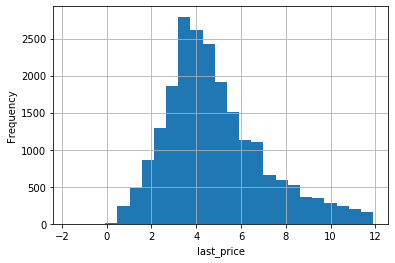

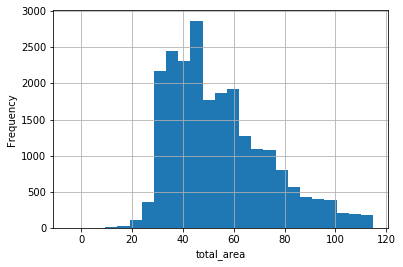

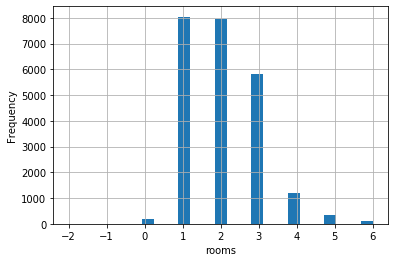

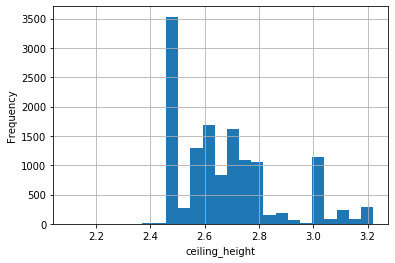

In [32]:
list=('last_price','total_area','rooms','ceiling_height')
for i in list:
    q1,q3=np.nanpercentile(df_realty[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    df_realty[i].plot(kind='hist',bins=25,range=(lower_bound,upper_bound),grid=True)
    plt.xlabel(i)
    plt.show()

Как видим цена лежит приемущесвтенно в диапазоне до 12 млн, общая площадь 20-120 кв.м, комнаты 0-6 шт, высота потолка 2.5-3.2м.

###### Время продажи квартиры

среднее значение 180.88863436982163
медианное значение 95.0


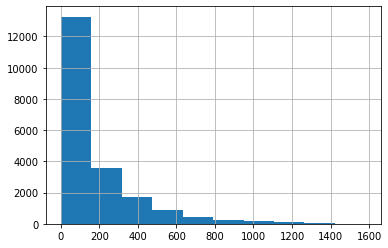

In [33]:
df_realty['days_exposition'].hist()
print('среднее значение', df_realty['days_exposition'].mean())
print('медианное значение', df_realty['days_exposition'].median())

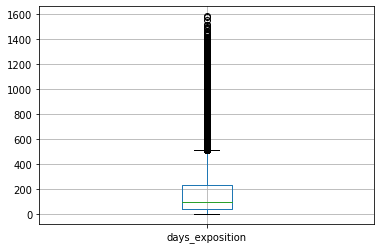

In [34]:
df_realty.boxplot(column='days_exposition')
plt.show()

Распределение не является нормальным, поэтому ориентироваться на среднее число при оценке будет не точно, плюс среднее отличается от медианы в 2 раза. По графику boxplot можно судить, что приемущественно продажи занимают от 10 до 220 дней, примерно. При этом медиана 95 дней. Соответсвтено, можно оценить, что все значения за пределами 'коробки' либо слишком быстрыми продажами, либо слишком долгими.
Заменим редкие и выбивающиеся значения, те что больше 600 дней на NaN

###### Уберем выбросы и редкие значения

Для отчистки данных создадим формулу, которая бы рассчитывала Q1-3*IQR и Q3+3*IQR и на их основании установим верхний и нижний предел наших данных. Выведем 'boxplot' по каждой категории,чтобы проверить качество замены.

In [35]:
def replace_item(item):
    if lower_bound>item or item>upper_bound:
        return pd.np.nan
    else:
        return item

Верхняя граница:170762.50
Нижняя граница:20078.50
Медиана:95000.00


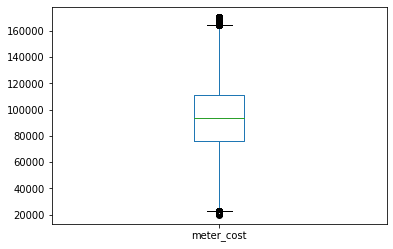

Верхняя граница:11.90
Нижняя граница:0.00
Медиана:4.65


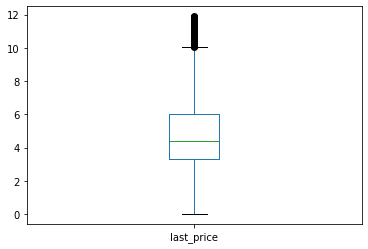

Верхняя граница:6.00
Нижняя граница:0.00
Медиана:2.00


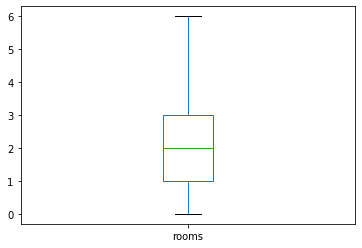

Верхняя граница:3.22
Нижняя граница:2.10
Медиана:2.65


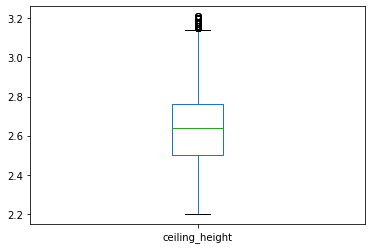

Верхняя граница:512.50
Нижняя граница:0.00
Медиана:95.00


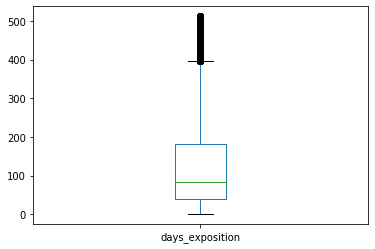

In [36]:
list_of_items=['meter_cost','last_price','rooms','ceiling_height','days_exposition']
for i in list_of_items:
    q1,q3=np.nanpercentile(df_realty[i],[25, 75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    median_data=df_realty[i].median()
    if lower_bound<0:
        lower_bound=0
    print('Верхняя граница:{:.2f}'. format(upper_bound))
    print('Нижняя граница:{:.2f}'. format(lower_bound))
    print('Медиана:{:.2f}'. format(median_data))
    df_realty[i]=df_realty[i].apply(replace_item)
    df_realty[i].plot(kind='box')
    plt.show()

Как видим, после отчистки данных от выбрасов данным графиков boxplot мы имеем срок продажи в диапазоне 24-163тыс.руб / кв.м и медиану 93тыс.руб /кв.м , стоимость до 9.3 млн.руб и медиану 4.3 млн.руб. , кол-во комнат ограничилось 6тью комнатами, хотя раньше доходило до 100, а высота потолка находится в диапазоне 2.12-3.12м, а медиана 2.6м

###### Зависимость цены квартиры

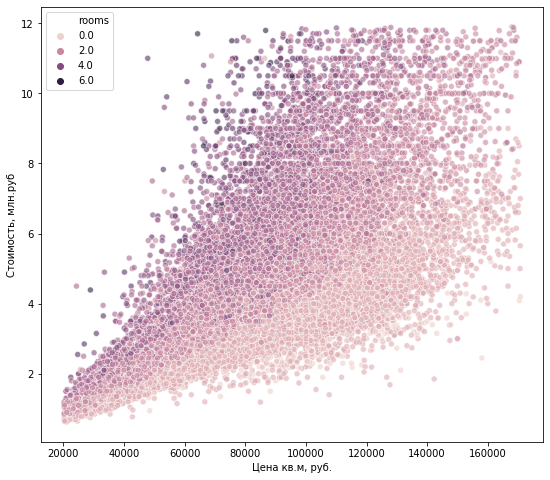

In [37]:
figure(figsize=(9,8))
ax=sns.scatterplot(x='meter_cost',y='last_price',hue='rooms',data=df_realty,alpha=0.6)
ax.set(xlabel='Цена кв.м, руб.',ylabel='Стоимость, млн.руб')
plt.show()

Видим, что довольно линейно растет стоимость квартиры от стоимости квадратного метра. Причем с увеличением числа комнат рост становится интенсивнее

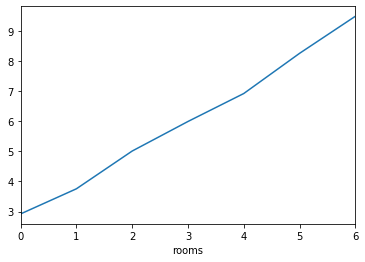

In [38]:
df_realty.groupby('rooms')['last_price'].mean().plot()

Как видим, цена растет практически линейно с увеличение кол-ва комнат

In [39]:
df_realty['city_groups']=pd.qcut(df_realty['cityCenters_nearest'],20)
df_realty_city_groups_dict=df_realty['city_groups'].drop_duplicates().sort_values().reset_index(drop=True)
df_realty_city_groups_dict

0       (180.999, 3541.0]
1        (3541.0, 4766.0]
2        (4766.0, 5854.0]
3        (5854.0, 7756.0]
4        (7756.0, 9238.0]
5       (9238.0, 10493.5]
6      (10493.5, 11275.6]
7      (11275.6, 11908.8]
8      (11908.8, 12447.0]
9      (12447.0, 13098.5]
10     (13098.5, 13743.0]
11     (13743.0, 14450.0]
12     (14450.0, 14975.0]
13     (14975.0, 15616.6]
14     (15616.6, 16293.0]
15     (16293.0, 17256.0]
16    (17256.0, 19341.55]
17    (19341.55, 25955.8]
18     (25955.8, 31671.6]
19     (31671.6, 65968.0]
20                    NaN
Name: city_groups, dtype: category
Categories (20, interval[float64]): [(180.999, 3541.0] < (3541.0, 4766.0] < (4766.0, 5854.0] < (5854.0, 7756.0] ... (17256.0, 19341.55] < (19341.55, 25955.8] < (25955.8, 31671.6] < (31671.6, 65968.0]]

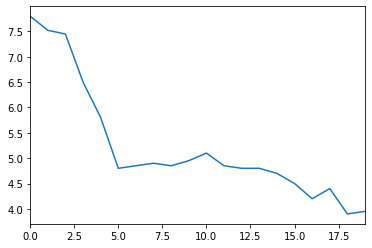

In [40]:
df_realty.groupby('city_groups')['last_price'].median().plot(use_index=False)

С удалением от от центра мы видим плавное снижение с 0 до 2.5км, затем происходим быстрое падение до 5км и затем стабилизация цены до 10км и далее планое снижение с ростом удаленности.

In [41]:
df_realty.groupby('floor_name')['last_price'].median()

floor_name
другой       4.595
первый       3.800
последний    4.000
Name: last_price, dtype: float64

Как видим, самая низкая стоимость у квартир на первом этаже, затем идут квартиры на последнем. Самый дорогие квариры на других этажах.

In [42]:
df_realty.pivot_table(index=pd.DatetimeIndex(df_realty['first_day_exposition']).day, values='last_price',aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition,,
1,4.300,1042
2,4.370,632
3,4.500,603
4,4.590,625
5,4.500,589
6,4.195,618
7,4.300,668
8,4.400,712


По дням недели нельзя выявить явной закономерности

In [43]:
df_realty.pivot_table(index=pd.DatetimeIndex(df_realty['first_day_exposition']).month, values='last_price',aggfunc=['mean','count'])

,mean,count
,last_price,last_price
first_day_exposition,,
1,4.801527,1357
2,4.833719,2413
3,4.803588,2367
4,4.944180,2179
5,4.827289,1162
6,4.676428,1618
7,4.837161,1540
8,4.837321,1596


По месяцам тоже нет явной закономерности, разве что в 5 и 6 месяц(май,июнь) мы видим падение медианой цены.

In [44]:
df_realty.pivot_table(index=pd.DatetimeIndex(df_realty['first_day_exposition']).year, values='last_price',aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition,,
2014,5.50,89
2015,4.90,1016
2016,4.30,2517
2017,4.30,7489
2018,4.39,7916
2019,4.80,2611


По годам уже можно сделать заключение, что с 2014 года по 2018 наблюдалось падение медианой стоимости, скорее всего причина- экономический кризис в РФ. В 2019 году мы видим востановление роста стоимости

In [45]:
df_realty.corr().loc[('cityCenters_nearest','rooms','meter_cost'),'last_price']

cityCenters_nearest   -0.345710
rooms                  0.451968
meter_cost             0.588820
Name: last_price, dtype: float64

Как видим,сильнее всего стоимость зависить от цены кв.м, затем идет кол-во комнат, а уже потом удаленность от центра. Причем удаленность от центра имеет обратную зависимость, чем дальше-тем дешевле квартира.

###### Выберем 10 населенных пунктов

In [46]:
df_realty_10cities=(df_realty.pivot_table(index='locality_name', 
                 values='meter_cost',
                 aggfunc=['median','count']).reset_index().sort_values(('count','meter_cost'),ascending=False).loc[:10])
#df_realty_10cities.loc[:10,[('count','meter_cost'),('median','meter_cost')]]
df_realty_10cities


/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/pivot.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,index,median,count
,,meter_cost,meter_cost
33,Санкт-Петербург,102969.5,14808
291,посёлок Мурино,85878.0,522
326,посёлок Шушары,76876.0,440
3,Всеволожск,65789.0,397
32,Пушкин,99865.5,366
13,Колпино,74723.5,338
296,посёлок Парголово,91642.0,327
6,Гатчина,67925.5,304
93,деревня Кудрово,91860.0,299


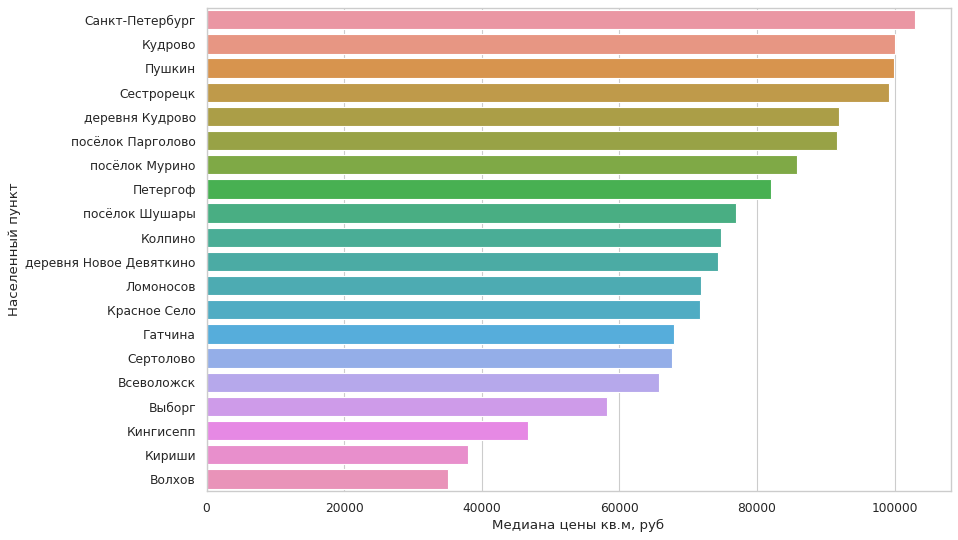

In [47]:
figure(figsize=(12,8),dpi=80)
sns.set(style="whitegrid")
sns.barplot(x=('median','meter_cost'),y='index',ci='sd', data=df_realty_10cities.sort_values(('median','meter_cost'),ascending=False))
plt.xlabel('Медиана цены кв.м, руб')
plt.ylabel('Населенный пункт')
plt.show()

  Как видно, из общего числа самых популярных населенных пунктов лидером по стоимости квадратного метра является Санкт_Петербург, а с самым низким - Выборг.

###### Изучим Санкт-Петербург

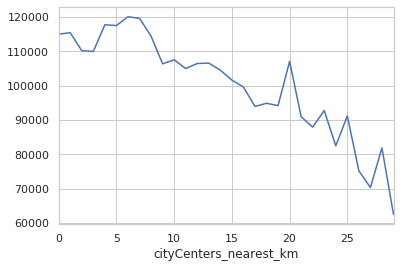

In [48]:
df_realty['cityCenters_nearest_km']=df_realty['cityCenters_nearest']//1000
df_realty[df_realty['locality_name']=='Санкт-Петербург'].groupby('cityCenters_nearest_km')['meter_cost'].mean().plot()

Центром Санкт-Петербурга можно считать растояние от 0 до 3км, но мы видим, резкий рост стоимости кв.м. Т.к. СПб находится на островах и самые дорогие районы находятся в удалении от центра, в отличии от той же Москвы, то скорее всего второй пик описывает как раз район Крестовского острова и Петроградский. Можно считать, что  Санкт_Петербурге есть два центра. 0-3км и 3-7км.

###### Анализ стоимости квартир в центре

In [49]:
df_realty_center=df_realty.query('locality_name=="Санкт-Петербург" and cityCenters_nearest_km < 8')
df_realty_spb=df_realty.query('locality_name=="Санкт-Петербург"')

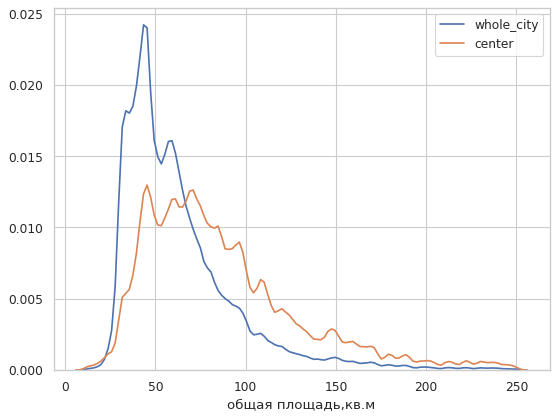

In [50]:

figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x=df_realty_center['total_area']
y=df_realty_spb['total_area']
bins = np.linspace(0, 400, 200)
#plt.hist(x, bins, alpha=0.5, label='x')
#plt.hist(y, bins, alpha=0.5, label='x')
sns.kdeplot(y, bw=2,label='whole_city',clip=(0,250))
sns.kdeplot(x, bw=2,label='center',clip=(0,250))
plt.xlabel('общая площадь,кв.м')
plt.show()


Видим, что основной метраж квартир находится в диапазоне 45-100 кв.м в центральной части города, и 30-70кв.м во всем городе СПб

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


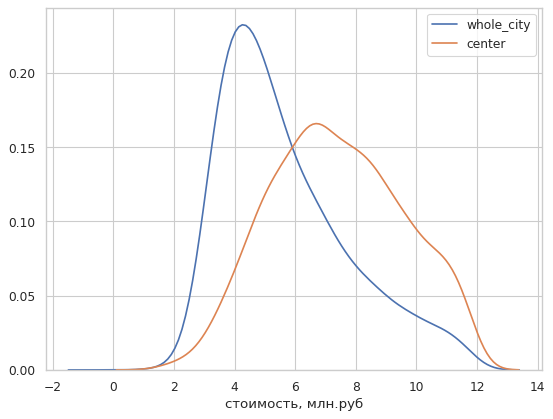

In [51]:
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x=df_realty_center['last_price']
y=df_realty_spb['last_price']
sns.kdeplot(y, bw=0.5,label='whole_city',clip=(0,40))
sns.kdeplot(x, bw=0.5,label='center',clip=(0,40))
plt.xlabel('стоимость, млн.руб')
plt.show()

При этом цена от 3 до 6 млн преобладает в центральной части и от 3 до 10млн в общем по СПб

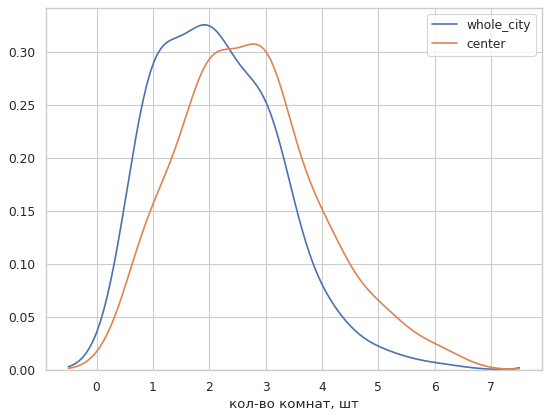

In [52]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x=df_realty_center['rooms']
y=df_realty_spb['rooms']
bins = np.linspace(0, 20, 20)
sns.kdeplot(y, bw=0.5,label='whole_city',clip=(0,10))
sns.kdeplot(x, bw=0.5,label='center',clip=(0,10))
plt.xlabel('кол-во комнат, шт')
plt.show()

2 и 3х комнатные квартиры самые популярные в центральной части, а по городу 1,2 и 3х конатные квартиры по всему СПб

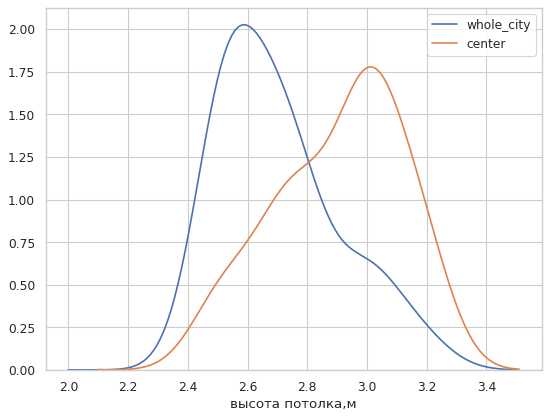

In [53]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x=df_realty_center['ceiling_height']
y=df_realty_spb['ceiling_height']
sns.kdeplot(y, bw=0.1,label='whole_city',clip=(0,5))
sns.kdeplot(x, bw=0.1,label='center',clip=(0,5))
plt.xlabel('высота потолка,м')
plt.show()

Самая частовстречающаяся высота потолка 2.7-3.3 м в центральной части, а на втором месте 2.2-2.7м, в то время как по городе СПб чаще всего мы видим объявления с выостой потолка 2.2-2.7м

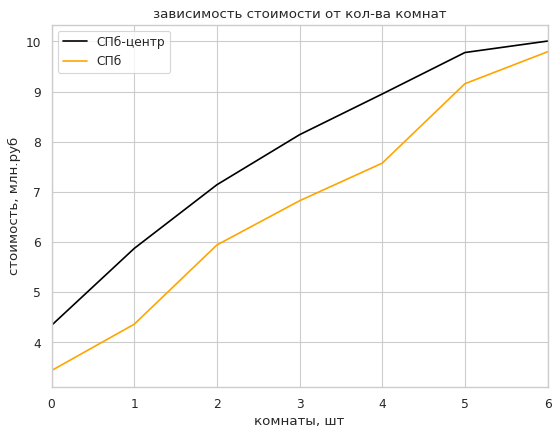

In [54]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
df_realty_center.groupby('rooms')['last_price'].mean().plot(title='зависимость стоимости от кол-ва комнат',color='black',legend=True,label='СПб-центр')
df_realty_spb.groupby('rooms')['last_price'].mean().plot(color='orange',legend=True,label='СПб')
plt.xlabel('комнаты, шт')
plt.ylabel('стоимость, млн.руб')
plt.show()

Мы видим, что в центре квартиры стоят в средней дороже

In [55]:
print('Центр города')
print(df_realty_center.groupby('floor_name')['last_price'].median())
print('Весь город')
print(df_realty_spb.groupby('floor_name')['last_price'].median())

Центр города
floor_name
другой       7.5000
первый       5.9945
последний    7.5000
Name: last_price, dtype: float64
Весь город
floor_name
другой       5.2
первый       4.7
последний    5.0
Name: last_price, dtype: float64


Видим, что самые дешевые квартиры это квартиры на 1м этаже, причем в центре города медианная цены 'последней' и 'другого' этажа равны.

In [56]:
df_realty_center.pivot_table(index=pd.DatetimeIndex(df_realty_center['first_day_exposition']).year, values='last_price',aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition,,
2014,5.965000,8
2015,7.507581,202
2016,7.450000,339
2017,7.200000,877
2018,7.290000,764
2019,7.500000,250


In [57]:
df_realty_spb.pivot_table(index=pd.DatetimeIndex(df_realty_spb['first_day_exposition']).year, values='last_price',aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition,,
2014,6.625,54
2015,5.500,680
2016,5.000,1607
2017,4.950,4854
2018,5.150,4802
2019,5.500,1740


Как мы виидим, произошло падение цен на квартиры во всем городе и центре в период 2015-2018 года.
При этом мы видим, что падение цен во всем городе было сильнее чем в центральной части, во всем городе по сравнению с 2015г примерно 10%, а по центральной части около 5%.

In [58]:
df_realty_spb.corr().loc[('cityCenters_nearest','rooms','meter_cost'),'last_price']

cityCenters_nearest   -0.366129
rooms                  0.522257
meter_cost             0.353794
Name: last_price, dtype: float64

In [59]:
df_realty_center.corr().loc[('cityCenters_nearest','rooms','meter_cost'),'last_price']

cityCenters_nearest   -0.175935
rooms                  0.485893
meter_cost             0.146512
Name: last_price, dtype: float64

Цены в центре СПб больше зависят от кол-ва комнат, нежели от стоимости кв.м или удаленности от георафического центра, что довольно очевидно, в то время как по всему городу СПб мы видм так же, что больше всего стоимость зависит от кол-ва комнта, но и влияние расстояния до центра и стоимость кв.м играем сильную роль.

### Шаг 5. Общий вывод

В данной работе мы проделали следующие шаги:
- изучили данные, выявили большое кол-во пропусков в таблице
- обыяснили причины их возникновения, заполнили те из них, которые было возможно
- произвели замену типа данных в столбце даты
- проанализировали данные исходя из лимита 1.5*IQR для Q1 и Q3
- отчистили данные и убрали выбросы исходя из данных графиков boxplot
- проанализировали весь город Санкт-Петербург и его центральную часть
- выявили закономерности и корреляцию между параметрами
- сделали выводы на каждом шаге
---
По результатам анализа можно сделать следующие выводы:
стоимость квартиры сильно зависит от удаленности от центра 
на примере СПб мы видим, что зону центра можно выделить в радиусе 7км, т.к. есть удаленные дорогие районы от центра. 
При этом на квартиры в центральной части выше спрос на 2-3 комнатные квартиры большего метража по сравнению с городом в целом, стоимось очевижно будет выше, но в случае потрясений как в 2015г, мы видим, что падение стоимости квартиры в центре в рублях было ниже чем по городу в общем. При этом самые дешевые варианты в обоих случаю- квартиры на первом этаже. 
Так же стоимость квартиры сильно зависит от количества комнта и это является самым важным фактором, хотя все же это функция от общей площади квартиры и чаще квартиры с большим кол-вом комнат являются 'элитными'.
И большая часть квартир имеет высоту потолка в центре выше, чем вобщем по городу. Тут причиной может быть скорее старая застройка с высокими потолками.